In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.groupby(["survived","sex"])["survived"].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df = df.drop(["deck","alive","embark_town"],axis=1)

In [8]:
df.shape

(891, 12)

In [9]:
df["age"] = df["age"].fillna(df["age"].mean())

In [10]:
df = df.dropna()
df.shape

(889, 12)

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [12]:
x = df.drop(["survived"], axis=1)
y = df["survived"]

In [13]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [14]:
mms = MinMaxScaler()
le = LabelEncoder()

In [15]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        x[col] = mms.fit_transform(x[[col]])
    else:
        x[col] = le.fit_transform(x[col])

In [16]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,1.0,1,0.271174,0.125,0.0,0.014151,2,2,1,1.0,0.0
1,0.0,0,0.472229,0.125,0.0,0.139136,0,0,2,0.0,0.0
2,1.0,0,0.321438,0.000,0.0,0.015469,2,2,2,0.0,1.0
3,0.0,0,0.434531,0.125,0.0,0.103644,2,0,2,0.0,0.0
4,1.0,1,0.434531,0.000,0.0,0.015713,2,2,1,1.0,1.0


In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.2,random_state=42)


In [18]:
xtrain.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
708,0.0,0,0.271174,0.000,0.000000,0.295806,2,0,2,0.0,1.0
240,1.0,0,0.367921,0.125,0.000000,0.028213,0,2,2,0.0,0.0
382,1.0,1,0.396833,0.000,0.000000,0.015469,2,2,1,1.0,1.0
792,1.0,0,0.367921,1.000,0.333333,0.135753,2,2,2,0.0,0.0
683,1.0,1,0.170646,0.625,0.333333,0.091543,2,2,0,0.0,0.0


In [19]:
knn_classifier = KNeighborsClassifier()

In [20]:
model = knn_classifier.fit(xtrain,ytrain)

In [21]:
model.score(xtrain,ytrain)

0.8748241912798875

In [22]:
model.score(xtest,ytest)

0.7808988764044944

In [23]:
pred_y = model.predict(xtest)
pred_y

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [24]:
cm = confusion_matrix(ytest,pred_y)
cm

array([[88, 21],
       [18, 51]])

<Axes: >

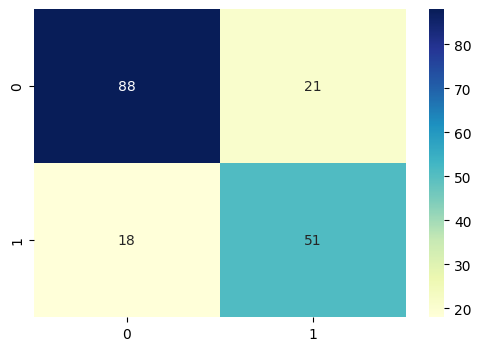

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='YlGnBu')

In [26]:
ytest.value_counts()

survived
0    109
1     69
Name: count, dtype: int64

In [27]:
clr = classification_report(pred_y, ytest)
print(clr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       106
           1       0.74      0.71      0.72        72

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [28]:
ac_score = accuracy_score(pred_y,ytest)
ac_score

0.7808988764044944

In [29]:
# ck best k value
for i in range(2,20):
    print(f"value of k is: {i}")

    knn1 = KNeighborsClassifier(n_neighbors=i)
    model1 = knn1.fit(xtrain,ytrain)
    print("model train score is ")
    print(model1.score(xtrain,ytrain))
    print("model test score is ")
    print(model1.score(xtest,ytest))
    pred = model1.predict(xtest)
    print("evaluate the model")
    cm = confusion_matrix(pred,ytest)
    print(cm)
    print("<-------------->")
    print()

value of k is: 2
model train score is 
0.8987341772151899
model test score is 
0.797752808988764
evaluate the model
[[92 19]
 [17 50]]
<-------------->

value of k is: 3
model train score is 
0.8804500703234881
model test score is 
0.7865168539325843
evaluate the model
[[88 17]
 [21 52]]
<-------------->

value of k is: 4
model train score is 
0.8790436005625879
model test score is 
0.797752808988764
evaluate the model
[[91 18]
 [18 51]]
<-------------->

value of k is: 5
model train score is 
0.8748241912798875
model test score is 
0.7808988764044944
evaluate the model
[[88 18]
 [21 51]]
<-------------->

value of k is: 6
model train score is 
0.8537271448663853
model test score is 
0.7921348314606742
evaluate the model
[[93 21]
 [16 48]]
<-------------->

value of k is: 7
model train score is 
0.849507735583685
model test score is 
0.7696629213483146
evaluate the model
[[89 21]
 [20 48]]
<-------------->

value of k is: 8
model train score is 
0.8509142053445851
model test score is 


In [ ]:
train_score = []
test_score = []
for i in range(2,20):
    print(f"value of k is: {i}")
    knn1 = KNeighborsClassifier(n_neighbors=i)
    model1 = knn1.fit(xtrain,ytrain)
    #append train score
    tr_sc =model1.score(xtrain,ytrain)
    train_score.append(tr_sc)
    # append test score
    ts_sc = model1.score(xtest,ytest)
    test_score.append(ts_sc)

In [31]:
train_score

[0.8987341772151899,
 0.8804500703234881,
 0.8790436005625879,
 0.8748241912798875,
 0.8537271448663853,
 0.849507735583685,
 0.8509142053445851,
 0.849507735583685,
 0.8340365682137834,
 0.8438818565400844,
 0.8368495077355836,
 0.8354430379746836,
 0.8270042194092827,
 0.8326300984528833,
 0.8227848101265823,
 0.8143459915611815,
 0.8185654008438819,
 0.829817158931083]

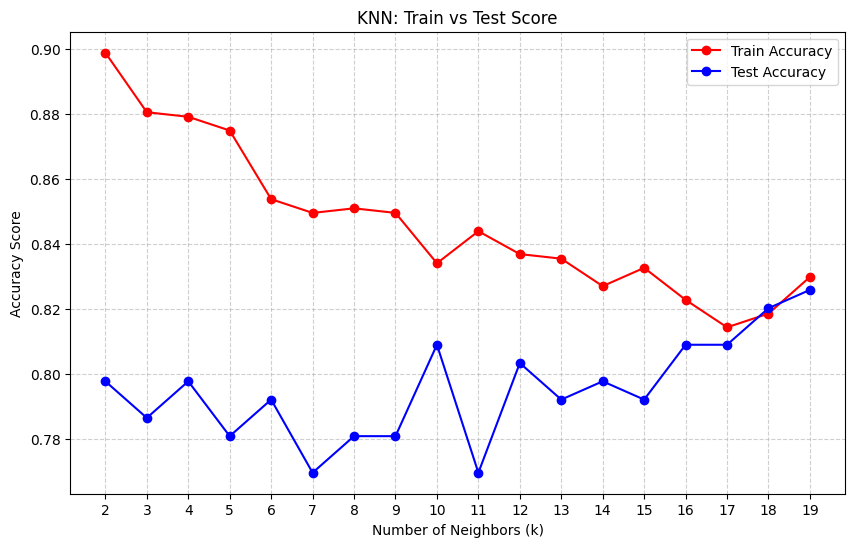

In [48]:
# range(2, 20) matches your loop range
k_range = range(2, 20)

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_score, label='Train Accuracy', marker='o', color='red')
plt.plot(k_range, test_score, label='Test Accuracy', marker='o', color='blue')

plt.xticks(k_range)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN: Train vs Test Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()